# Conclusion in this notebook
### Decade 70 and 80 are one of the major transformations but follow experiment 5 as well where we only applied this

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

In [3]:
df = pd.read_csv("../data/auto-mpg.data", sep = r"\s+", header = None, names = column_names, na_values = "?")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [6]:
df.dropna(inplace = True)

In [7]:
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [8]:
#Captures performance potential
# df['acc_per_weight'] = df['acceleration'] / df['weight']

In [9]:
# Relates engine size per cylinder
df['engine_efficiency'] = df['displacement'] / df['cylinders']

In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name',
       'engine_efficiency'],
      dtype='object')

In [11]:
corr = df.drop(["model_year", 'car_name'], axis = 1).corr()

<Axes: >

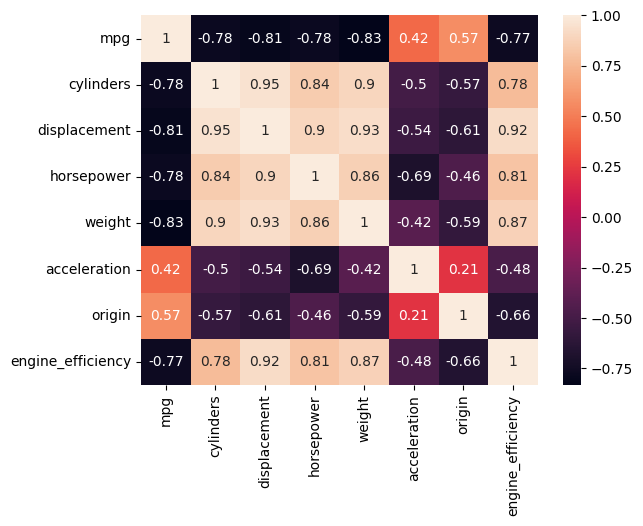

In [12]:
sns.heatmap(corr, annot=True)

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,engine_efficiency
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,38.375
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,43.750
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,39.750
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,38.000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,37.750


#### we will play with car names in 3rd experiement

In [14]:
np.unique([car_name.split(" ")[0] for car_name in df['car_name'].values ])

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype='<U13')

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name',
       'engine_efficiency'],
      dtype='object')

In [16]:
numeric_columns = ["displacement", "horsepower", "weight", "acceleration","engine_efficiency" ]
from sklearn.preprocessing import StandardScaler, Normalizer
df.drop("car_name", axis =1 , inplace = True)   
# scaler = StandardScaler()
scaler = Normalizer()

In [17]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,engine_efficiency
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,38.375


In [18]:
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [19]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,engine_efficiency
0,18.0,8,0.087215,0.036931,0.995439,0.003409,70,1,0.010902


In [20]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,engine_efficiency
0,18.0,8,0.087215,0.036931,0.995439,0.003409,70,1,0.010902
1,15.0,8,0.094251,0.044433,0.994482,0.003097,70,1,0.011781
2,18.0,8,0.092062,0.043426,0.994734,0.003185,70,1,0.011508
3,16.0,8,0.088118,0.043479,0.995094,0.003478,70,1,0.011015
4,17.0,8,0.087151,0.040401,0.995311,0.003030,70,1,0.010894
...,...,...,...,...,...,...,...,...,...
393,27.0,4,0.050088,0.030768,0.998177,0.005581,82,1,0.012522
394,44.0,4,0.045473,0.024377,0.998537,0.011532,82,2,0.011368
395,32.0,4,0.058676,0.036509,0.997489,0.005042,82,1,0.014669
396,28.0,4,0.045642,0.030048,0.998416,0.007074,82,1,0.011410


In [22]:
X = df.drop(["mpg","model_year", "acceleration", "weight"], axis = 1)
y = df['mpg']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state = 42)

In [23]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape

((313, 5), (313,), (79, 5), (79,))

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Before Hyper-Parameter Tuning

In [25]:
from sklearn.metrics import r2_score

In [26]:
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    RandomForestRegressor(),
    DecisionTreeRegressor()
]

for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{regressor.__class__.__name__}: R² Score = {r2:.4f}")

LinearRegression: R² Score = 0.5930
Ridge: R² Score = 0.5752
Lasso: R² Score = 0.5881
ElasticNet: R² Score = 0.5921
SVR: R² Score = 0.6046
RandomForestRegressor: R² Score = 0.6308
DecisionTreeRegressor: R² Score = 0.2849


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
regressors = [
    {'model': LinearRegression(), 'params': {}},  # No hyperparameters to tune
    {'model': Ridge(), 'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}},
    {'model': Lasso(), 'params': {'alpha': [0.1, 1.0, 10.0], 'max_iter': [1000, 2000]}},
    {'model': ElasticNet(), 'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}},
    {'model': SVR(), 'params': {'C': [0.1, 1.0, 10.0], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']}},
    {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20,30, 40]}},
    {'model': DecisionTreeRegressor(), 'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 3]}}
]

In [29]:
model_names= []
r2_scores = []
fold_scores = []
for reg in regressors:
    model = reg['model']
    param_grid = reg['params']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, return_train_score=False)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    best_index = grid_search.best_index_
    fold_r2_scores = [grid_search.cv_results_[f'split{i}_test_score'][best_index] for i in range(5)]
    
    model_names.append(model.__class__.__name__)
    r2_scores.append(r2)
    fold_scores.append(fold_r2_scores)
    
    print(f"{model.__class__.__name__}:")
    print(f"Best Parameters: {best_params}")
    print(f"R² Score (Test): {r2:.4f}")
    print(f"Cross-Validated R² Score: {grid_search.best_score_:.4f}")
    print("R² Scores per Fold:", [f"{s:.4f}" for s in fold_r2_scores])
    print("-" * 50)

LinearRegression:
Best Parameters: {}
R² Score (Test): 0.5930
Cross-Validated R² Score: 0.6231
R² Scores per Fold: ['0.5324', '0.6780', '0.6266', '0.7147', '0.5637']
--------------------------------------------------
Ridge:
Best Parameters: {'alpha': 0.1}
R² Score (Test): 0.5766
Cross-Validated R² Score: 0.6297
R² Scores per Fold: ['0.5497', '0.6578', '0.6049', '0.7476', '0.5888']
--------------------------------------------------
Lasso:
Best Parameters: {'alpha': 0.1, 'max_iter': 1000}
R² Score (Test): 0.5787
Cross-Validated R² Score: 0.6289
R² Scores per Fold: ['0.5498', '0.6543', '0.6012', '0.7497', '0.5897']
--------------------------------------------------
ElasticNet:
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
R² Score (Test): 0.5796
Cross-Validated R² Score: 0.6289
R² Scores per Fold: ['0.5500', '0.6545', '0.6012', '0.7493', '0.5896']
--------------------------------------------------
SVR:
Best Parameters: {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}
R² Score (Test): 0.63

### Random Forest and SVR Performed the Best , so lets check which one is actually best amongst them
#### So we will use pairwise test to check the r2_score across each fold of RandomForest and SVR

In [ ]:
data = pd.DataFrame({
    'Model': model_names,
    'Fold_Scores': fold_scores
})

In [ ]:
data

In [ ]:
import pingouin as pg

In [ ]:
svr_scores = data.loc[data['Model'] == 'SVR', 'Fold_Scores'].values[0]
rf_scores = data.loc[data['Model'] == 'RandomForestRegressor', 'Fold_Scores'].values[0]

In [ ]:
from scipy.stats import shapiro

In [ ]:
def compare_models(scores_a, scores_b, model_a="Model_A", model_b="Model_B"):
    diffs = np.array(scores_a) - np.array(scores_b)
    normality_p = shapiro(diffs).pvalue
    ttest_res = pg.ttest(scores_a, scores_b, paired=True)
    wilcoxon_res = pg.wilcoxon(scores_a, scores_b)
    if normality_p > 0.05 and len(scores_a) >= 10:
        decision = "Normality OK → Use Paired T-Test"
    elif normality_p > 0.05 and len(scores_a) < 10:
        decision = "Normality OK but small sample → Report both tests"
    else:
        decision = "Normality violated → Prefer Wilcoxon"
    t_p = ttest_res['p-val'].values[0]
    w_p = wilcoxon_res['p-val'].values[0]
    t_interpret = "Significant difference ✅" if t_p < 0.05 else "No significant difference ❌"
    w_interpret = "Significant difference ✅" if w_p < 0.05 else "No significant difference ❌"
    print(f"\n📊 Comparison: {model_a} vs {model_b}")
    print(f"Normality p-value: {normality_p:.4f}")
    print(f"T-Test: p={t_p:.4f}, T={ttest_res['T'].values[0]:.4f} → {t_interpret}")
    print(f"Wilcoxon: p={w_p:.4f}, W={wilcoxon_res['W-val'].values[0]:.4f} → {w_interpret}")
    print(f"Decision: {decision}")

In [ ]:
compare_models(svr_scores, rf_scores, "SVR", "RandomForest")

### We can use both but will go with RandomForest